<a href="https://colab.research.google.com/github/cataa0/ADA-informes/blob/main/MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Problema: Sub-arrreglo máximo

**Entrada**: Arreglo de números $[a_1,a_n]$

**Salida**: Sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.

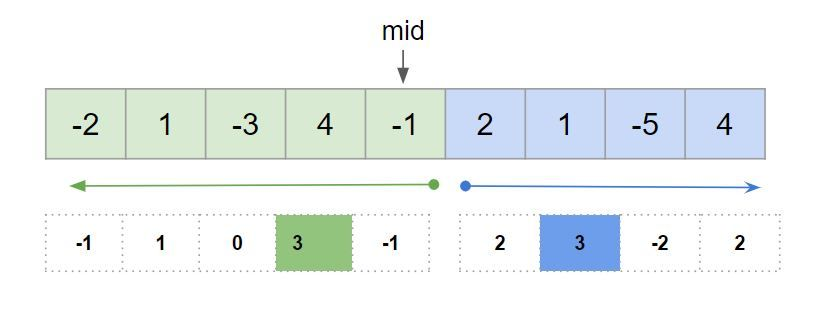

El problema del subarreglo maximo se basa en poder encontrar la suma maxima del lado derecho y de la submatriz que cruza por el medio. Es decir encontraremos como su nombre lo dice el sub-arreglo maximo entre estas 3 submatrices, el objetivo es encontrar la suma maxima en el arreglo principal.

A diferencia de los algoritmos vistos anteriormente este es un problema de optimizacion, lo que quiere decir que busca la mejor solucion a todas las soluciones posibles. 


# 2. MaxSubArrayMid y MaxSubarray

## 2.1 Codigo

In [81]:
 
def maxSubArrayMid(arr, l, m, h, verbose=False):
#Parte izquierda 
  sm = 0
  left_sum = -1000
  cross_star=m
  for i in range(m-1, l-1, -1):
    sm = sm + arr[i]
    if (sm > left_sum):
      left_sum = sm
      cross_star=i
  if (verbose==True):
    print("Subarreglo parte izquierda", arr[cross_start:m])
    print("Suma maxima parte izquierda", sm)
#Parte Derecha
  sm = 0
  right_sum = -1000
  cross_end=m+1
  for i in range(m, h):
    sm = sm + arr[i]
    if (sm > right_sum):
      right_sum = sm
      cross_end=i+1
  if (verbose==True):
    print("Subarreglo parte derecha", arr[m:cross_end])
    print("Suma maxima parte derecha", sm)
#Retorna index de inicio, index final y la suma de los valores del maximo sub-arreglo.
  return cross_star,cross_end,right_sum+left_sum

def maxSubArraySum(arr, l=0, h=None, verbose = False):
  if (h==None):
    h=len(arr)

#Mejor caso
  if (l == h-1):
    return l,h,arr[l]

#Sacamos el medio
  m = (l + h) // 2 


#Recursion
  left_start,left_end,left_max=maxSubArraySum(arr,l,m)
  right_start,right_end,right_max=maxSubArraySum(arr,m,h)
  cross_start,cross_end,cross_max=maxCrossingSum(arr,l,m,h)

  if (verbose==True):
    print("Subarreglo parte izquierda", arr[cross_start:m])
  if (verbose==True):
    print("Subarreglo parte derecha", arr[m:cross_end]) 
  if (verbose==True):
    print("Subarreglo parte media", arr[cross_start:cross_end])   

  if(left_max > right_max and left_max > cross_max):
    if (verbose==True):
      print("Subarreglo maximo parte izquierda", arr[left_start:left_end])
    return left_start,left_end,left_max

  if(right_max > left_max and right_max > cross_max):
    if (verbose==True):
      print("Subarreglo maximo parte derecha", arr[right_start:right_end])
    return right_start,right_end,right_max

  if (verbose==True):
      print("Subarreglo maximo parte media", arr[cross_start+1:cross_end-1])
  return cross_start,cross_end,cross_max

 

arr = [2, -6, 3, -1, 2, -2]
n = len(arr)
start,end,max_sum = maxSubArraySum(arr)
print("input:", arr)
print("El maximo subarreglo empieza en el indice",start)
print("El maximo subarreglo termina en el indice",end-1)
print("La suma del maximo subarreglo es",max_sum)


input: [2, -6, 3, -1, 2, -2]
El maximo subarreglo empieza en el indice 2
El maximo subarreglo termina en el indice 4
La suma del maximo subarreglo es 4


## 2.2 Descripcion del algoritmo

La funcion recibe un arreglo de n elementos, y los indices low(parte izquierda), mid(medio) y high(derecha).
Se va dividiendo el arreglo en 2 recursivamente en k subproblemas (donde 1 ≤ k ≤ n).
Se va resolviendo el problema en cada subarreglo, viendo cual es la suma mayor de acad subarreglo solo o combinado, este algoritmo se resulve partiendo por la divicion del arreglo en la parte izquierda, luego se analiza la parte derecha y por ultimo se analia la parte de en medio.

Con la funcion maxSubArrayMid 

1.Sacamos la suma maxima del subarreglo de la parte izquierda

2.Sacamos la suma maxima del subarreglo de la parte derecha

3.Sacamos la suma maxima del subarreglo que contenga mid

Se llama nuevamente a la funcion y se ve cual es la maxima suma entre los 3.

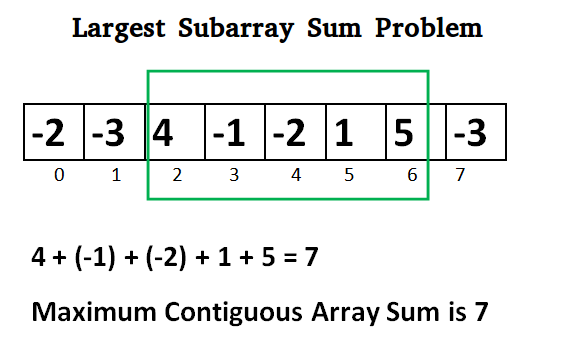

## 2.3 Ejemplo

Tenemos el siguiente input : [2, -1, 3, 6]

El arreglo se divide en parte izquierda y parte derecha: left[2, -1] right[3, 6]

Luego de tener los 2 subarreglos llamamos recursivamente a la funcion maxSubArraySum y dividimos en 2 la parte izquierda lo que nos dejaria 2 valores [2] y [-1]

Despues se llama a la funcion maxSubArrayMid en la cual sacamos la suma maxima entre los 2 arreglos la cual seria solo el [2] ya que [2, -1] daria como resultado [1] y lo que busca la funcion es la suma maxima, por lo tanto hasta ahi llega ya que el subarreglo maximo de la parte izquierda es el [2].

Luego analiza la parte derecha del arreglo principal, tenemos el siguiente arreglo [3, 6] se llama recursivamente a la funcion y queda [3] y [6], despues vemos que la suma maxima del subarreglo es [3, 6] lo cual daria [9]

Despues se analiza la suma maxima incluyendo el medio del arreglo que finalmente daria [3, 6] lo cual seria la posicion del 2 al 3.

Finalmente nos retorna que la suma maxima del arreglo seria [3, 6] lo cual no da una suma de 9 y que empieza en el indice 2 hasta el indice 3. 







## 2.4 Ejecucion del algoritmo paso a paso (verbose=True)

In [82]:
import random
arr=[2, -6, 3, -1, 2]
n=len(arr)
start,end,max_sum = maxSubArraySum(arr, verbose=True)

Subarreglo parte izquierda [2, -6]
Subarreglo parte derecha [3, -1, 2]
Subarreglo parte media [2, -6, 3, -1, 2]
Subarreglo maximo parte derecha [3, -1, 2]


# 3. Correctitud

## 3.1 Correctitud MaxSubArraySum
La función *MaxSubArraySum* recibe el arreglo de n elementos, con el objetivo de encontrar el subarreglo máximo, retornando los índices $i$ y $j$ tal que  y la suma máxima.

## Prueba del Teorema
Para poder probar el teorema, utilizaremos la **inducción matemática**, ya que el algoritmo contiene recursividad.

Para probar una declaración $P(n)$ en inducción matemática, debemos:

1. Probar $P(n)$ para un caso base, por ejemplo P(1)
2. Probar que si $P(m)$ es cierto $m < n$, entonces $P(n)$ también lo es.

> **Caso Base:** En este caso, el arreglo contiene sólo un elemento, como es el único retornandolo inmediatamente, por lo que podemos deducir que corresponde a la máxima suma que se puede generar.
>
> **Caso Promedio:** En el caso promedio, la función iterativamente divide el arreglo en 2, teniendo así $a = n/2$ y $b = n/2$. Cómo la función  es recursiva, llegará al caso base, retornando sólo un elemento. Como el algoritmo encuentra la suma máxima y cada arreglo tiene tamaño n/2, se asume que el paso inductivo es correcto ya que $1 < a < b < n$.

Cómo el caso base y el caso promedio son correctos y la función retorna un subarreglo que maximiza la suma, el teorema de correctitud es correcto.

## 3.2 Correctitud MaxSubArrayMid

Ya que la función MaxSubArrayMid ** itera de distinta forma según el caso, para probar el teorema utilizaremos la **propiedad invariante**.

> **Inicialización:** Al comienzo de la iteración, las variables de suma para la mitad izquierda y derecha comienzan con el valor de -1000 asegurandonos que antes de revisar los elementos la suma de estos será mayor, así asumiendo que el subarreglo contiene la máxima suma.
>
> **Mantención:** Durante la iteración, sólo en caso que la suma de lo elementos sea mayor a uestra variable fija (right_sum o left_sum) se irán actualizando, es por esto que en todo momemnto estará guardada la suma máxima. Retornando la máxima suma entre los 3 casos, la del subarreglo derecho, izquierdo o el cruce en el punto medio.

# 4. Tiempo de ejecucion

El algoritmo **divide y vencerás** para el problema del sub-arreglo máximo consiste en dividir el arreglo por la mitad por el índice del medio, realizando llamadas recursivas en cada uno de los dos sub-arreglos para encontrar el sub-arreglo máximo en la mitad izquierda y mitad derecha, con esa premisa podemos determinar que: 

***T(n)=*** \begin{cases}
  O(1)  & n \text{ es 1} \\
  2 T(n/2) + O(n) & n \text{ es más de 1 elemento}
\end{cases}

Usando el teorema maestro visto en clases, se puede identificar que corresponde al caso número 1 donde a=b^d, por ende, podemos determinar que el tiempo de complejidad es = **O(nlogn)**

# 5. Experimentos

## 5.1 Comparacion Algoritmo Kadane

In [58]:
# Función para encontrar la suma máxima de un subarray contiguo
# en una array de enteros dada
def kadane(A):
 
    # almacena la sublista de suma máxima encontrada hasta el momento
    max_so_far = 0
 
    # almacena la suma máxima de la sublista que termina en la posición actual
    max_ending_here = 0
 
    # recorrer la lista dada
    for i in A:
        # actualice la suma máxima de la sublista "finalizando" en el índice `i` (agregando el
        # elemento actual a la suma máxima que termina en el índice anterior `i-1`)
        max_ending_here = max_ending_here + i
 
        # si la suma máxima es negativa, configúrelo en 0 (lo que representa
        # una sublista vacía)
        max_ending_here = max(max_ending_here, 0)
 
        # actualiza el resultado si se encuentra que la suma de la sublista actual es mayor
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far
 
 
if __name__ == '__main__':
 
    A = [-2, 1, 3, 4, -1]
 
    print("The sum of contiguous sublist with the largest sum is",
        kadane(A))

The sum of contiguous sublist with the largest sum is 8


El algoritmo de kadane es de los algorimos mas conocidos para encontrar la suma maxima del arreglo. Esta vez compararemos los tiempos de ejecucion del algoritmo de kadane con el algoritmo divide y venceras.

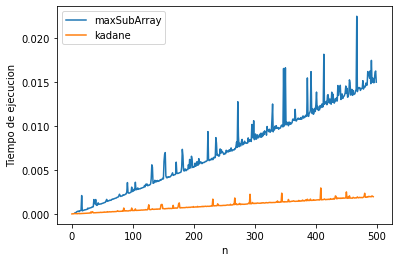

In [59]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; z=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)
  t = repeat(setup="from __main__ import maxSubArraySum", stmt=f"maxSubArraySum({a})", repeat=1, number=10)
  v = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(v)


plt.plot(x,y,z)
plt.legend(["maxSubArray","kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo de ejecucion')
plt.show()

### Analisis de resultados

Podemos ver en el grafico que el tiempo de ejecucion del algoritmo de Kadane es mucho mas rapido que el algoritmo creado de "divide y venveras". El algoritmo de Kadane tiene un tiempo de O(n) en cambio "Divide y Venceras" tiene un tiempo de O(n log n) 

## 5.2 Comparacion Algoritmo "Divide y Venceras", Algoritmo Kadane y Algoritmo Fuerza Bruta

Los 3 algoritmos se basan en lo mismo, poder encontrar la suma maxima del arreglo principal. 

El algoritmo Divide y Venceras se basa en dividir en arreglo hasta que quede subarreglos con indice 0 tiene una complejidad O(n log n).

El algoritmo Kadane se basa en ir comparando los numeros del arreglo de izquierda a derecha y guardando la suma en una submatrix hasta encontrar la maxima tiene una complejidad O(n)

El algoritmo Fuerza Bruta se basa en comparar todos los numeros del arreglo y buscar la suma maxima tiene una complejida O(n^2)

Como podemos ver el algoritmo mas rapido es del de Kadane segun la complejidad.

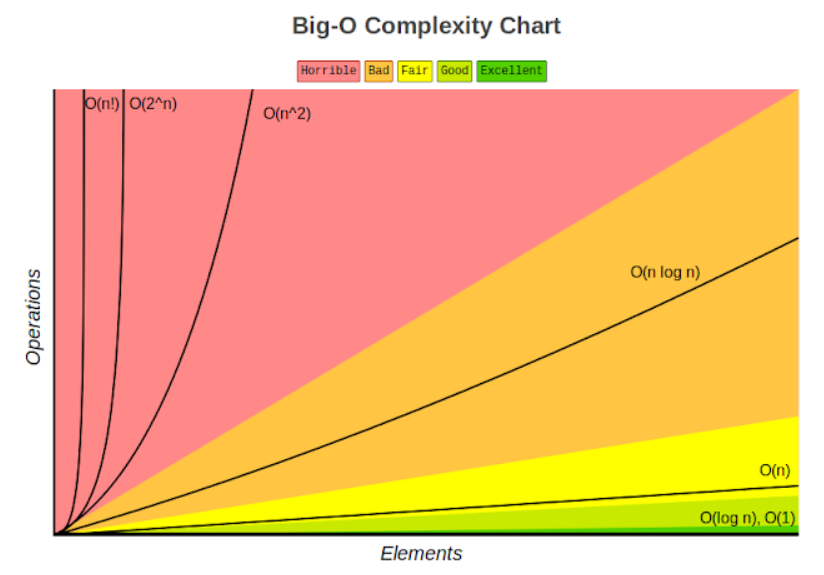